In [314]:
import pandas as pd
import matplotlib.pyplot as plt

In [315]:
name = "comb15"
df_cloud = pd.read_csv(f'data/{name}-cloud.log')
df_edge = pd.read_csv(f'data/{name}-edge.log')
df_cluster = pd.read_csv(f'data/{name}-cluster.log')

In [316]:
#Print the size of the datasets
print(f"Edge-Cloud: {len(df_cloud)}")
print(f"Edge Only: {len(df_edge)}")
print(f"Edge Only Different Cluster: {len(df_cluster)}")

Edge-Cloud: 14145
Edge Only: 14145
Edge Only Different Cluster: 14145


In [317]:
df_cloud.head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674470050016,1305,HTTP Request 2,200,OK,ThreadGroup2 2-3,text,True,NaN,429,274,4,4,http://10.10.1.2:1323/invoke/hash,1301,0,1
1,1674470051296,288,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,413,274,3,3,http://10.10.1.2:1323/invoke/hash,287,0,1
2,1674470052140,333,HTTP Request 2,200,OK,ThreadGroup2 2-5,text,True,NaN,405,274,4,6,http://10.10.1.2:1323/invoke/hash,333,0,5
3,1674470052175,323,HTTP Request 2,200,OK,ThreadGroup2 2-6,text,True,NaN,403,274,3,5,http://10.10.1.2:1323/invoke/hash,323,0,1
4,1674470052675,272,HTTP Request 2,200,OK,ThreadGroup2 2-7,text,True,NaN,413,274,4,6,http://10.10.1.2:1323/invoke/hash,272,0,3


In [318]:
error_cloud = df_cloud[df_cloud['responseCode'] != 200]
error_edge = df_edge[df_edge['responseCode'] != 200]
error_cluster = df_cluster[df_cluster['responseCode'] != 200]
#filter dataframes by response code
filtered_cloud = df_cloud[df_cloud['responseCode'] == 200]
filtered_edge = df_edge[df_edge['responseCode'] == 200]
filtered_cluster = df_cluster[df_cluster['responseCode'] == 200]

In [319]:
mean_cloud = filtered_cloud['elapsed'].mean()
mean_edge = filtered_edge['elapsed'].mean()
mean_cluster = filtered_cluster['elapsed'].mean()

print(f"Mean Edge-Cloud: {mean_cloud}")
print(f"Mean Edge Only: {mean_edge}")
print(f"Mean Edge Only different clusters: {mean_cluster}")

Mean Edge-Cloud: 472.98311981914094
Mean Edge Only: 603.4840579710145
Mean Edge Only different clusters: 762.1725698126546


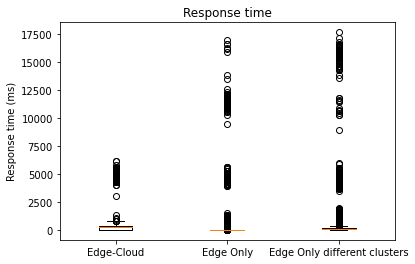

In [320]:
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud['elapsed'], filtered_edge['elapsed'], filtered_cluster['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title('Response time')
plt.show()

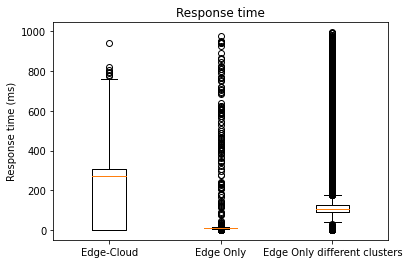

In [321]:
#Remove outliers
limit = 1000
filtered_cloud_o = filtered_cloud[filtered_cloud['elapsed'] < limit]
filtered_edge_o = filtered_edge[filtered_edge['elapsed'] < limit]
filtered_cluster_o = filtered_cluster[filtered_cluster['elapsed'] < limit]
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud_o['elapsed'], filtered_edge_o['elapsed'], filtered_cluster_o['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title('Response time')
plt.show()

In [322]:
filtered_cloud[filtered_cloud['threadName'].str.contains("ThreadGroup1")]

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
35,1674470052171,5389,HTTP Request 1,200,OK,ThreadGroup1 1-1,text,True,NaN,352,274,7,7,http://10.10.1.2:1323/invoke/fib,5389,0,1
37,1674470052469,5495,HTTP Request 1,200,OK,ThreadGroup1 1-2,text,True,NaN,353,274,6,6,http://10.10.1.2:1323/invoke/fib,5495,0,2
40,1674470053310,5273,HTTP Request 1,200,OK,ThreadGroup1 1-4,text,True,NaN,359,274,6,6,http://10.10.1.2:1323/invoke/fib,5273,0,4
41,1674470053232,5352,HTTP Request 1,200,OK,ThreadGroup1 1-3,text,True,NaN,357,274,5,5,http://10.10.1.2:1323/invoke/fib,5352,0,1
64,1674470057295,4331,HTTP Request 1,200,OK,ThreadGroup1 1-6,text,True,NaN,352,274,7,8,http://10.10.1.2:1323/invoke/fib,4331,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14140,1674470677455,4324,HTTP Request 1,200,OK,ThreadGroup1 1-1841,text,True,NaN,352,274,5,5,http://10.10.1.2:1323/invoke/fib,4324,0,1
14141,1674470677482,4355,HTTP Request 1,200,OK,ThreadGroup1 1-1842,text,True,NaN,351,274,4,4,http://10.10.1.2:1323/invoke/fib,4355,0,0
14142,1674470677788,4361,HTTP Request 1,200,OK,ThreadGroup1 1-1843,text,True,NaN,351,274,3,3,http://10.10.1.2:1323/invoke/fib,4361,0,0
14143,1674470677953,4319,HTTP Request 1,200,OK,ThreadGroup1 1-1844,text,True,NaN,351,274,2,2,http://10.10.1.2:1323/invoke/fib,4319,0,0


In [323]:
#Filter by threadName
filtered_cloud_t1 = filtered_cloud[filtered_cloud['threadName'].str.contains("ThreadGroup1", na=False)]
filtered_cloud_t2 = filtered_cloud[filtered_cloud['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_edge_t1 = filtered_edge[filtered_edge['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_edge_t2 = filtered_edge[filtered_edge['threadName'].str.contains('ThreadGroup2', na=False)]
filtered_cluster_t1 = filtered_cluster[filtered_cluster['threadName'].str.contains('ThreadGroup1', na=False)]
filtered_cluster_t2 = filtered_cluster[filtered_cluster['threadName'].str.contains('ThreadGroup2', na=False)]

In [324]:
#Get only Url
url_1 = filtered_cloud_t1['URL'].iloc[0]
url_2 = filtered_cloud_t2['URL'].iloc[0]

fun_name_1 = url_1.split('/')[4]
fun_name_2 = url_2.split('/')[4]
print(f"Function 1: {fun_name_1}")
print(f"Function 2: {fun_name_2}")

Function 1: fib
Function 2: hash


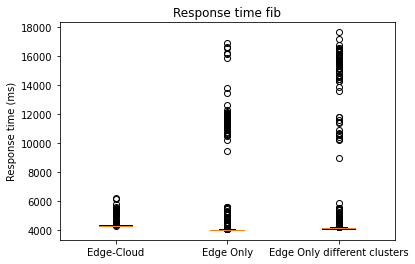

In [325]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud_t1['elapsed'], filtered_edge_t1['elapsed'], filtered_cluster_t1['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

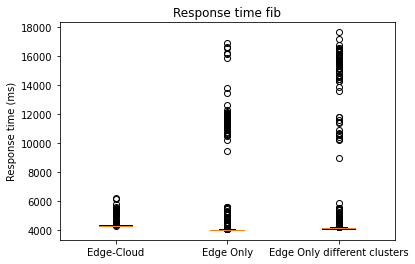

In [326]:
limit = 80000

x = filtered_cloud_t1[filtered_cloud_t1['elapsed'] < limit]
y = filtered_edge_t1[filtered_edge_t1['elapsed'] < limit]
z = filtered_cluster_t1[filtered_cluster_t1['elapsed'] < limit]
fig, ax = plt.subplots()
ax.boxplot([x['elapsed'], y['elapsed'], z['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_1}')
plt.show()

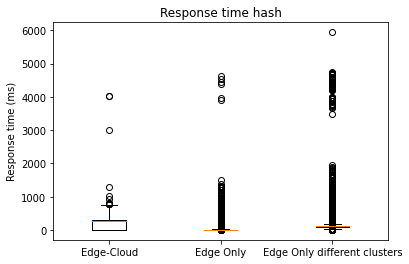

In [327]:
plt.show()
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud_t2['elapsed'], filtered_edge_t2['elapsed'], filtered_cluster_t2['elapsed']])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()

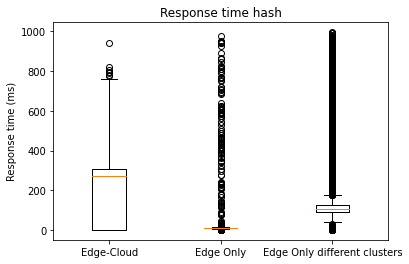

In [328]:
limit = 1000
fig, ax = plt.subplots()
ax.boxplot([filtered_cloud_t2['elapsed'][filtered_cloud_t2['elapsed'] < limit], filtered_edge_t2['elapsed'][filtered_edge_t2['elapsed'] < limit], filtered_cluster_t2['elapsed'][filtered_cluster_t2['elapsed'] < limit]])
ax.set_xticklabels(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'])
ax.set_ylabel('Response time (ms)')
ax.set_title(f'Response time {fun_name_2}')
plt.show()

0.06185931424531636 0.0 0.0


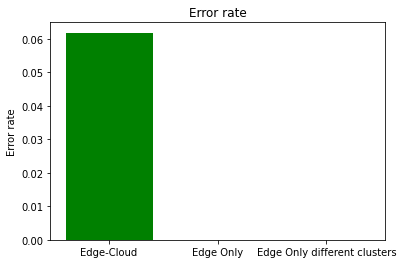

In [329]:
#Error rate of cloud and edge
error_rate_cloud = len(error_cloud) / len(df_cloud)
error_rate_edge = len(error_edge) / len(df_edge)
error_rate_cluster = len(error_cluster) / len(df_cluster)
print(error_rate_cloud, error_rate_edge, error_rate_cluster)
# Bar graph of error rate
fig, ax = plt.subplots()
ax.bar(['Edge-Cloud', 'Edge Only', 'Edge Only different clusters'], [error_rate_cloud, error_rate_edge, error_rate_cluster])
ax.patches[0].set_facecolor('green')
ax.patches[1].set_facecolor('red')
ax.patches[2].set_facecolor('blue')
ax.set_ylabel('Error rate')
ax.set_title('Error rate')
plt.show()